In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [3]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})


## Function declarations

### Read `ods` to `DataFrame`


In [4]:
def read_ods(filename, columns):
  key_arr = (k for k in columns.keys())
  df = pd.read_excel(filename, engine="odf", header=0,
                     usecols=columns)
  df = df.rename(columns=columns)
  return df

### Get accuracy measures

In [5]:
def get_accuracy_measures(dataframe, columns=["Y_t", "hat_Y_t"]):
  Y_t = dataframe[columns[0]]
  hat_Y_t = dataframe[columns[1]]

  MAPE = (((Y_t - hat_Y_t).abs())/Y_t.abs()).mean()
  MAD = (Y_t - hat_Y_t).abs().mean()
  MSD = ((Y_t - hat_Y_t)**2).mean()
  
  return MAPE, MAD, MSD


## Load the data

In [6]:
filename = "04-table-01-registration-new-passenger-cars.ods"

df = read_ods(filename, 
  {"Year": "t", 
   "Registrations (millions)": "Y_t"})

df.head()


,t,Y_t
0,1960,6.577
1,1961,5.855
2,1962,6.939
3,1963,7.557
4,1964,8.065


In [7]:
registrationArray = df["Y_t"].to_numpy()
tArray = np.reshape(np.arange(1, len(registrationArray)+1), (-1, 1))
# tArray = np.reshape(np.arange(len(registrationArray)), (-1, 1))
# tArray = np.reshape(df["Year"].to_numpy(), (-1, 1))


## Linear regression


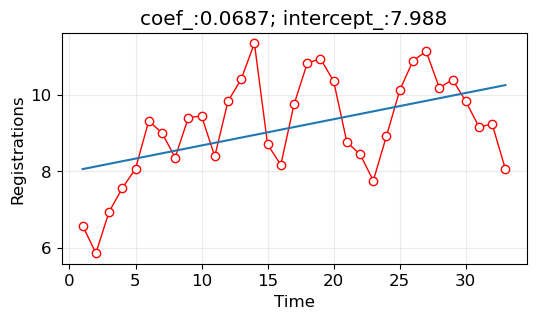

In [8]:
reg = LinearRegression().fit(tArray, registrationArray)
# print(tArray)
# print(SalesArray)
# reg.coef_, reg.intercept_

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(tArray, registrationArray, 'ro', markerfacecolor="white", linestyle='-', linewidth=1)
ax.plot(tArray, reg.coef_*tArray + reg.intercept_)

ax.set_title(f"coef_:{reg.coef_[0]:.4f}; intercept_:{reg.intercept_:.3f}")
ax.set_xlabel("Time")
ax.set_ylabel("Registrations")
ax.grid("on")

plt.show(fig)

## Trend estimate table

In [9]:
df_trend = df.copy()

df_trend["T_t"] = reg.coef_*tArray + reg.intercept_
df_trend["eT_t"] = df_trend["Y_t"] - df_trend["T_t"]
df_trend

,t,Y_t,T_t,eT_t
0,1960,6.577,8.056775,-1.479775
1,1961,5.855,8.125471,-2.270471
2,1962,6.939,8.194167,-1.255167
3,1963,7.557,8.262863,-0.705863
4,1964,8.065,8.331559,-0.266559
5,1965,9.314,8.400255,0.913745
6,1966,9.009,8.468951,0.540049
7,1967,8.357,8.537646,-0.180646
8,1968,9.404,8.606342,0.797658
9,1969,9.447,8.675038,0.771962


In [11]:
MAPE, MAD, MSD = get_accuracy_measures(
  df_trend, columns=["Y_t", "T_t"])
print(f"  MAPE  {MAPE*100:>6.4f}%")
print(f"  MAD    {MAD:>6.4f}")
print(f"  MSD    {MSD:>6.4f} ")


  MAPE  11.2739%
  MAD    0.9897
  MSD    1.3379 


## Forecasting

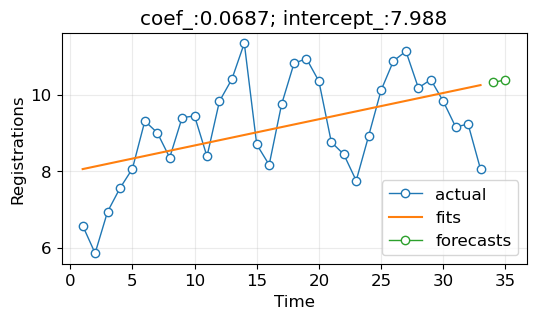

In [32]:
t_forecast = np.arange(tArray[-1]+1, tArray[-1]+1+2)
hat_Y_t = reg.coef_*t_forecast + reg.intercept_

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(tArray, registrationArray, 
  marker='o', markerfacecolor="white", 
  linestyle='-', linewidth=1, label="actual")
ax.plot(tArray, reg.coef_*tArray + reg.intercept_, 
  label="fits")
ax.plot(t_forecast, hat_Y_t, 
  marker='o', markerfacecolor="white", 
  linestyle='-', linewidth=1, label="forecasts")

ax.set_title(f"coef_:{reg.coef_[0]:.4f}; intercept_:{reg.intercept_:.3f}")
ax.set_xlabel("Time")
ax.set_ylabel("Registrations")
ax.grid("on")
ax.legend(loc="best")

plt.show(fig)


## Quadratic regression

In [6]:
model_quadratic = Pipeline(
  [('poly', PolynomialFeatures(degree=2)),
   ('linear', LinearRegression(fit_intercept=False))])

model_quadratic = model_quadratic.fit(tArray, registrationArray)
b0, b1, b2 = model_quadratic.named_steps['linear'].coef_
print(f"b0 = {b0:.3f}; b1 = {b1:.3f}; b2 = {b2:.5f}")

b0 = 6.356; b1 = 0.348; b2 = -0.00823
